# Demo MRR-NN
I will use the MNIST Dataset to demonstrate the usage of Lorentzian.py. While the MNIST task isn't the most suitable case for the application of a microring-resonator neural network, it is a well known task, benchmark and intuitive 

In [1]:
import tensorflow as tf
import lorentzian as lz
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load mnist data and norm it

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
mnist_input_shape = (28, 28)

In [3]:
# build model using MRRelu layers
model_mrrelu = tf.keras.Sequential()
model_mrrelu.add(tf.keras.layers.Flatten(input_shape=mnist_input_shape))
# the MRRelu should function just like a typical Dense layer with
# restrictions to ensure MRR possible behavior
model_mrrelu.add(lz.MMRelu(10, output_splitter=10))
model_mrrelu.add(lz.MMRelu(10))
model_mrrelu.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
mm_relu (MMRelu)             (None, 10)                7850      
_________________________________________________________________
mm_relu_1 (MMRelu)           (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [4]:
# define loss function and compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_mrrelu.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [5]:
history = model_mrrelu.fit(
    x_train, y_train, validation_split=0.1, epochs=25, batch_size=32
)

Epoch 1/25
1688/1688 [==============================] - 3s 2ms/step - loss: 1.0000 - accuracy: 0.7050 - val_loss: 0.3654 - val_accuracy: 0.9020
Epoch 2/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3966 - accuracy: 0.8873 - val_loss: 0.2910 - val_accuracy: 0.9187
Epoch 3/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3538 - accuracy: 0.8986 - val_loss: 0.2799 - val_accuracy: 0.9193
Epoch 4/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3341 - accuracy: 0.9045 - val_loss: 0.2642 - val_accuracy: 0.9237
Epoch 5/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3262 - accuracy: 0.9072 - val_loss: 0.2574 - val_accuracy: 0.9252
Epoch 6/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3187 - accuracy: 0.9082 - val_loss: 0.2579 - val_accuracy: 0.9295
Epoch 7/25
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3155 - accuracy: 0.9094 - val_loss: 0.2740 - val_accuracy:

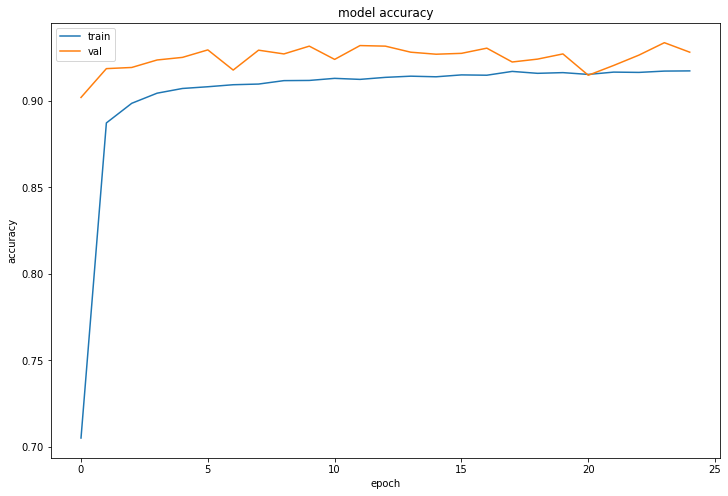

In [6]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [7]:
model_lorz = lz.create_lorentz_from_mrrelu(model_mrrelu)
model_lorz.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model_lorz.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
lorentzian (Lorentzian)      (None, 10)                7853      
_________________________________________________________________
lorentzian_1 (Lorentzian)    (None, 10)                113       
Total params: 7,966
Trainable params: 7,960
Non-trainable params: 6
_________________________________________________________________


In [8]:
model_lorz.evaluate(x_train, y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 1.5950 - accuracy: 0.9212


[1.5949803590774536, 0.9212166666984558]

In [9]:
history = model_lorz.fit(
    x_train, y_train, validation_split=0.1, epochs=10, batch_size=32
)

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.3712 - accuracy: 0.9212 - val_loss: 1.0125 - val_accuracy: 0.9337
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.0496 - accuracy: 0.9223 - val_loss: 0.8801 - val_accuracy: 0.9282
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.8535 - accuracy: 0.9219 - val_loss: 0.7381 - val_accuracy: 0.9277
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7226 - accuracy: 0.9237 - val_loss: 0.6076 - val_accuracy: 0.9317
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6188 - accuracy: 0.9231 - val_loss: 0.5244 - val_accuracy: 0.9338
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5390 - accuracy: 0.9246 - val_loss: 0.4873 - val_accuracy: 0.9287
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4772 - accuracy: 0.9233 - val_loss: 0.4155 - val_accuracy:

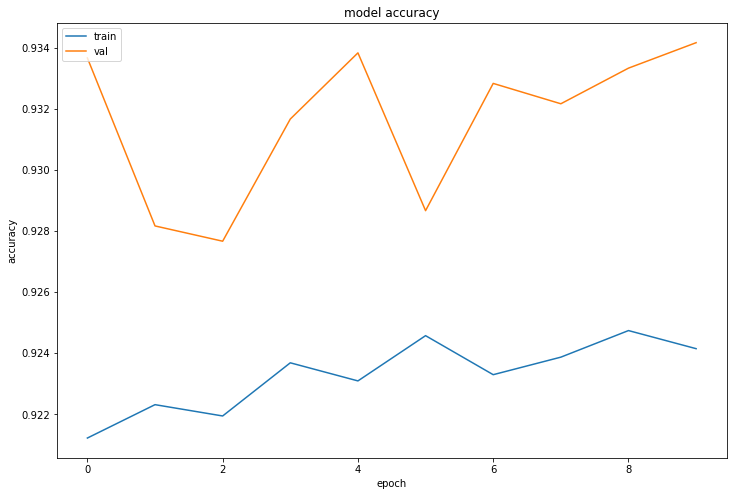

In [10]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [11]:
model_lorz.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3812 - accuracy: 0.9208


[0.38123220205307007, 0.920799970626831]

## Determine the necessary ring specifications and write them to file

In this example we want the rings to be centered around 1550nm with a gamma of 60pm. One could also supply a sensitivity for shifting the ring via a microheater. The default sensitivity is 1nm per 5mW supplied to the microheater.

The printed format is the following:\
$(n_L , n_{L+1} )$, center_wavelength, new_center_wavelength, gamma, delta_wavelength(shift), heating_power

In [12]:
lz.get_ring_specs(model_lorz, 1550, 60e-12, filename="Demo_MRR-NN.txt")